# Creating noise using PaleoBeasts

Author : Alexander James

Intro : The purpose of this notebook is to illustrate the different approaches one can take to generate noise using PaleoBeasts.

Note that to run this notebook at the moment it needs to be moved into the directory containing the `utils` folder. This will remain true until PaleoBeasts is on PyPi and is importable.

In [1]:
import pyleoclim as pyleo

In [2]:
#stopgap until paleobeasts is a package

import sys
import os

cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)

sys.path.append(parent_dir)
from utils.noise import from_param,from_series

### Creating noise from a target series

The simplest approach to creating noise is to use a pre-defined series you would like emulate. We'll show how to do this here using the NINO3 index for the past several decades, stored in `Pyleoclim`.

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [year C.E.]', ylabel='NINO3 [$^{\\circ}$C]'>)

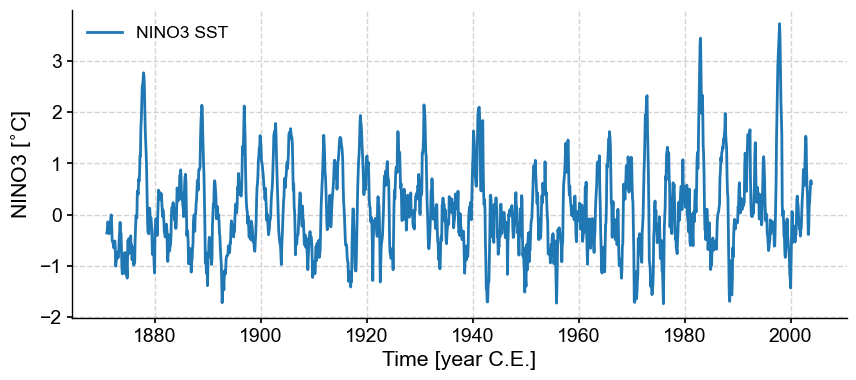

In [3]:
nino = pyleo.utils.load_dataset('NINO3')
nino.plot()

Available methods for this function include:

* 'ar1sim' : Simulate an AR(1) process with the same autocorrelation coefficient as the original series
* 'phaseran' : Phase randomize the original series and use that as noise
* 'uar1' : Similar to 'ar1sim'

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [year C.E.]', ylabel='NINO3 [$^{\\circ}$C]'>)

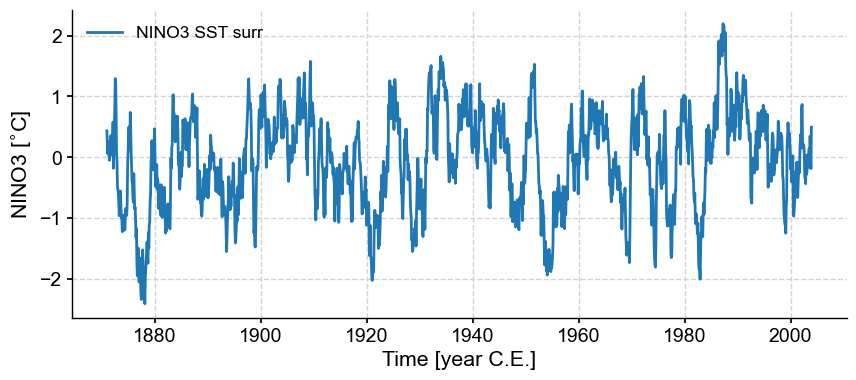

In [4]:
noise_series = from_series(nino, method='ar1sim')
noise_series.plot()

You can also specify the `number` parameter if you would like multiple noise realizations. This will return an ensemble.

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [year C.E.]', ylabel='NINO3 [$^{\\circ}$C]'>)

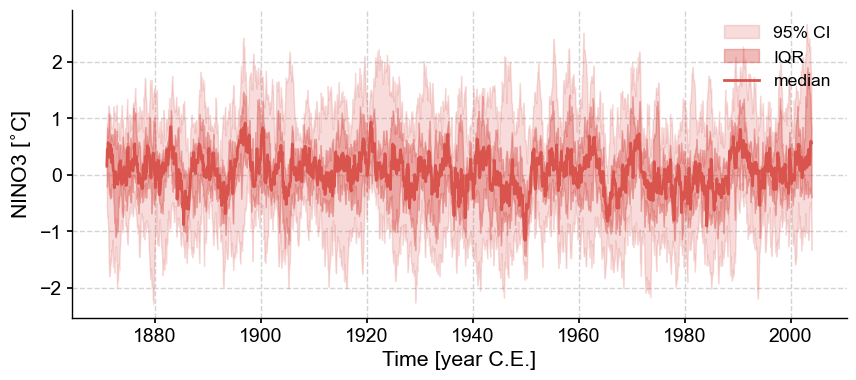

In [5]:
noise_series = from_series(nino, method='ar1sim',number=10)
noise_series.plot_envelope()

### Creating noise from parameter values

The other, somewhat more involved option to creating noise using PaleoBeasts is from a set of parameters. Both the choice of time axis and the value axis need to be carefully considered here.

#### The time axis

Creating the time axis can be done in a two main ways:

* By specifying the length and a type of spacing (using `time_pattern='even'` or `time_pattern='random'`)
* By specifying the time axis using a pre-defined array (using `time_pattern='specified'`)

Using `time_pattern='even'`:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

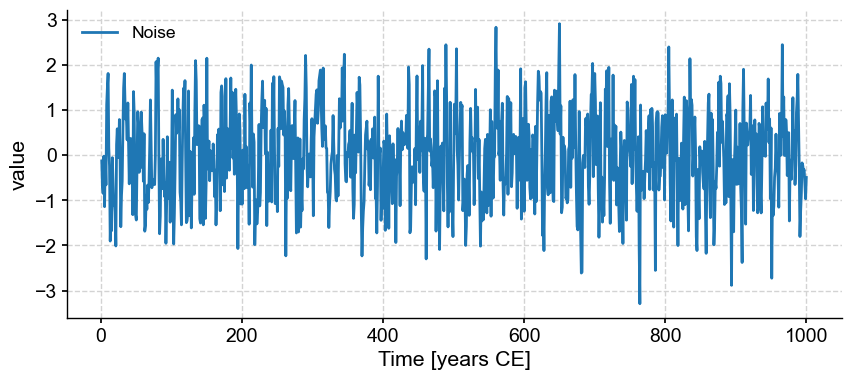

In [6]:
#Specifying the length and type of spacing
ts = from_param(method='uar1',length=1000,time_pattern='even',noise_param=[1,1])
ts.plot()

Using `time_pattern='random'` (note that this re-uses the pyleoclim function `random_time_axis`, the arguments for which can be passed in `settings`):

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

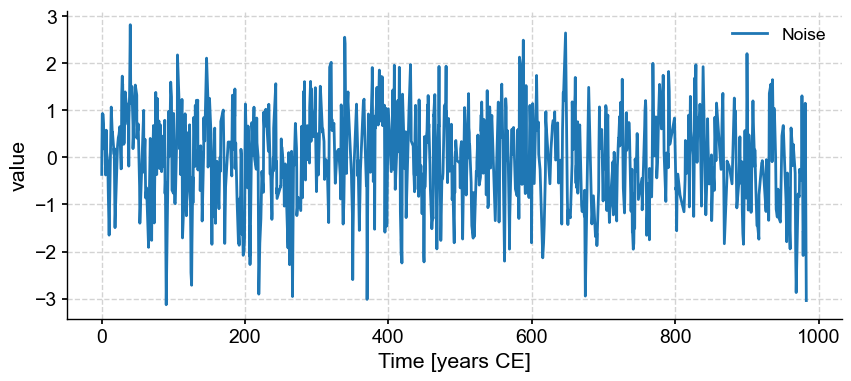

In [7]:
ts = from_param(method='uar1',noise_param=[1,1],length=1000,time_pattern='random',settings={'dist_name':'poisson','dist_param':2})
ts.plot()

Using `time_pattern='specified'`:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

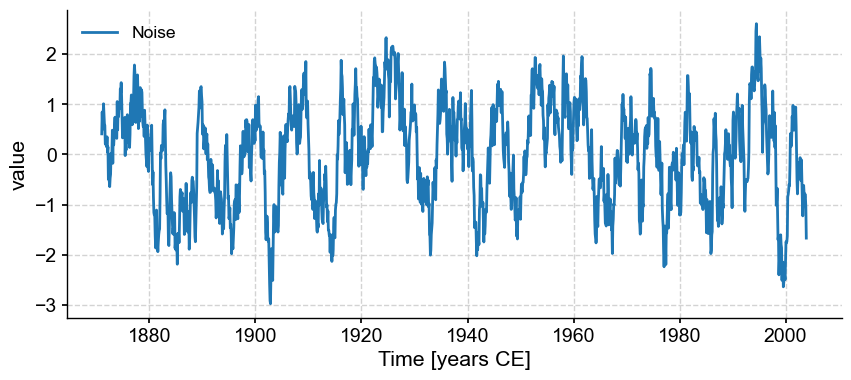

In [8]:
#Specifying the time axis itself
ts = from_param(method='uar1',noise_param=[1,1],time_pattern='specified',settings={'time':nino.time})
ts.plot()

#### The value axis

There are several methods available to specify the value axis (specified via the `method` argument):

* 'uar1' and 'ar1sim' : Simulates an AR(1) process with `noise_param=[tau,sigma]`
* 'power_law' : Simulates noise generated by a power law with `noise_param=[beta]`
* 'fGn' : Simulates fractional gaussian noise with `noise_param=[H]`
* 'white' : Simulates white noise

Each of these methods has it's own tunable parameter. We'll illustrate examples of these below.

Method = 'ar1' (this is the same as 'uar1')

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

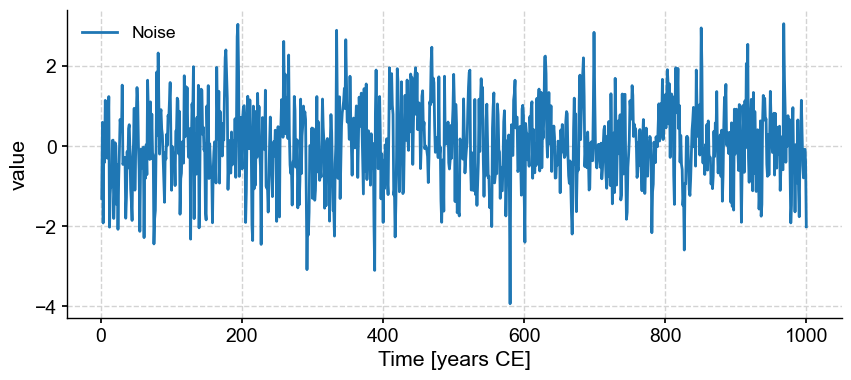

In [9]:
ts = from_param(method='uar1',noise_param=[1,1],length=1000)
ts.plot()

Method = 'power_law'

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

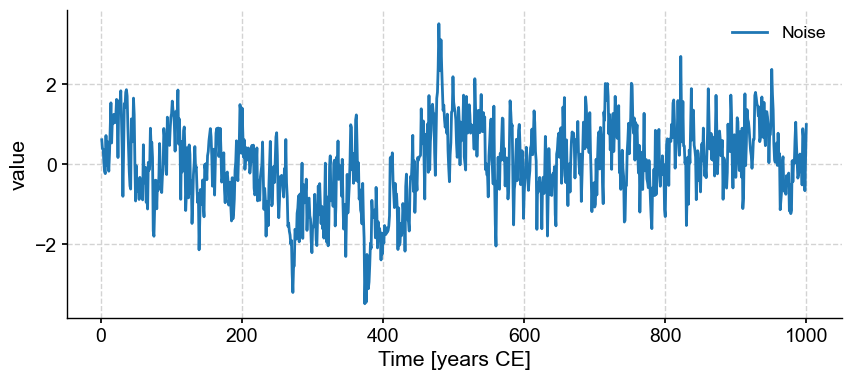

In [10]:
ts = from_param(method='power_law',noise_param=[1],length=1000)
ts.plot()

Method = 'fGn'

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

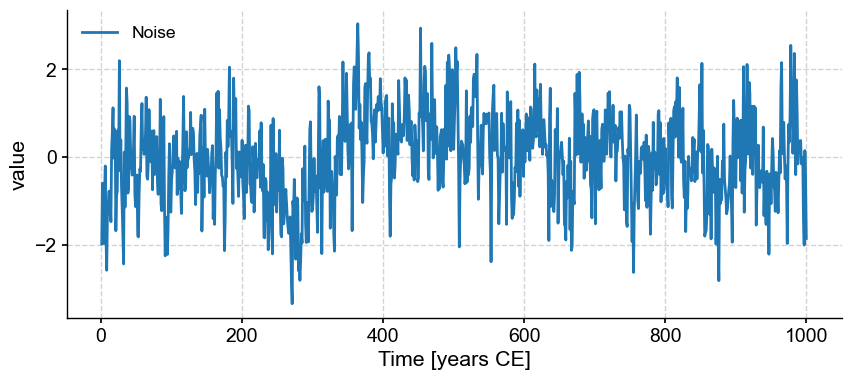

In [11]:
ts = from_param(method='fGn',noise_param=[.6],length=1000)
ts.plot()

Method = 'white'

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

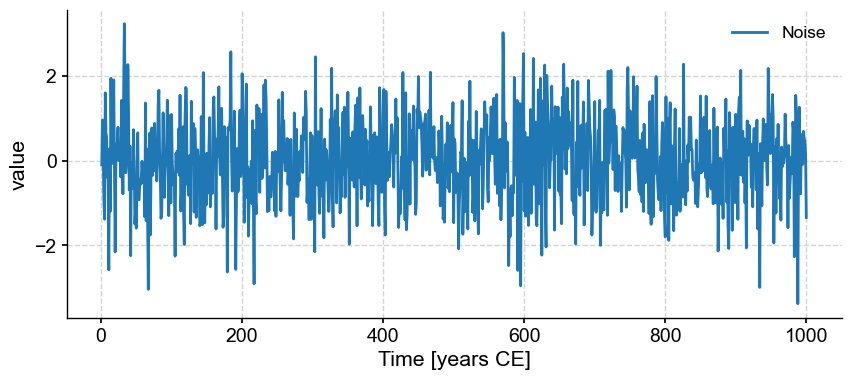

In [12]:
ts = from_param(method='white',length=1000)
ts.plot()

The scale of each of these realizations can be adjusted via the `scale` argument.

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

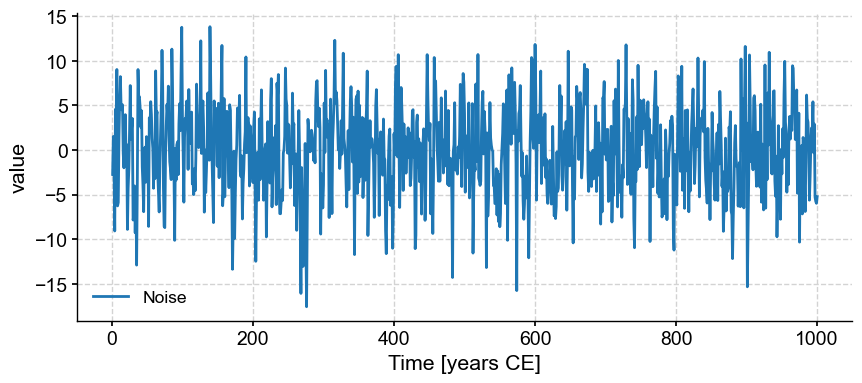

In [13]:
ts = from_param(scale=5,length=1000)
ts.plot()

All of these options are available as ensembles via the `number` argument.

In [14]:
ens = from_param(method='uar1',noise_param=[10,5],length=1000,number=10)

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [years CE]', ylabel='value'>)

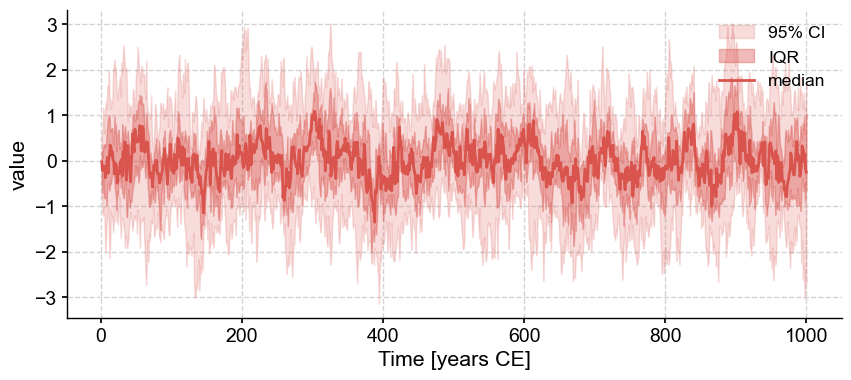

In [15]:
ens.plot_envelope()